# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, DBSCAN,KMeans
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import silhouette_score as sil


# Hierarchical Clustering

In [15]:
cd=pd.read_csv("crime_data.csv")
cd=cd.rename(columns={"Unnamed: 0":"State"})
print(cd.sample(5))
print("Crime_data Shape",cd.shape)

           State  Murder  Assault  UrbanPop  Rape
2        Arizona     8.1      294        80  31.0
33  North Dakota     0.8       45        44   7.3
10        Hawaii     5.3       46        83  20.2
4     California     9.0      276        91  40.6
6    Connecticut     3.3      110        77  11.1
Crime_data Shape (50, 5)


In [16]:
data=cd.iloc[:,1:]
data.head(6)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [17]:
scalar=MinMaxScaler()
data=scalar.fit_transform(data)
data=pd.DataFrame(data)
data.head(6)

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370


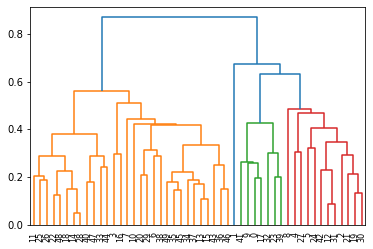

In [18]:
#dendrogram=sch.dendrogram(sch.linkage(data,method='single'))
#dendrogram=sch.dendrogram(sch.linkage(data,method='complete'))
dendrogram=sch.dendrogram(sch.linkage(data,method='average'))
#dendrogram=sch.dendrogram(sch.linkage(data,method='weighted'))
#dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
#dendrogram=sch.dendrogram(sch.linkage(data,method='centroid'))
#dendrogram=sch.dendrogram(sch.linkage(data,method='median'))



In [20]:
Hir_clu=AgglomerativeClustering(n_clusters=4,affinity='manhattan',linkage='average')
Cluster_ID=Hir_clu.fit_predict(data)
cd['H_Clu_ID']=Cluster_ID

In [21]:
cd.sample(5)

,State,Murder,Assault,UrbanPop,Rape,H_Clu_ID
8,Florida,15.4,335,80,31.9,1
47,West Virginia,5.7,81,39,9.3,0
12,Illinois,10.4,249,83,24.0,1
16,Kentucky,9.7,109,52,16.3,0
28,New Hampshire,2.1,57,56,9.5,0


In [22]:
cd.groupby(['H_Clu_ID'])['State'].apply(lambda x:tuple(x))

H_Clu_ID
0    (Arkansas, Connecticut, Delaware, Hawaii, Idah...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Alabama, Georgia, Louisiana, Mississippi, Nor...
3                                            (Alaska,)
Name: State, dtype: object

In [23]:
cd[cd["State"].isin(["Arkansas","Delaware","Hawaii"])]

,State,Murder,Assault,UrbanPop,Rape,H_Clu_ID
3,Arkansas,8.8,190,50,19.5,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0


In [24]:
cd[cd["State"].isin(["Arizona", "Arkansas", "Alabama"])]

,State,Murder,Assault,UrbanPop,Rape,H_Clu_ID
0,Alabama,13.2,236,58,21.2,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0


# K_Means

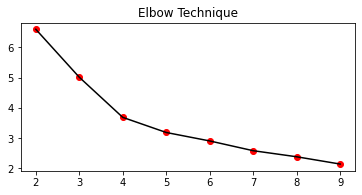

<function matplotlib.pyplot.show(close=None, block=None)>

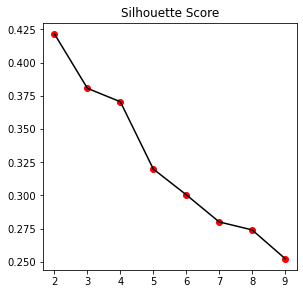

In [25]:
nc=[2,3,4,5,6,7,8,9]
iner=[]
sil_score=[]
for i in nc:
    km=KMeans(i)
    km.fit(data)
    iner.append(km.inertia_)
    hc1=AgglomerativeClustering(n_clusters=i,affinity='manhattan',linkage='average')
    y=hc1.fit_predict(data)
    sil_score.append(sil(data,y))
    
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("Elbow Technique")
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Silhouette Score")
plt.plot(nc,sil_score,color="black")
plt.scatter(nc,sil_score,color="red")
plt.show



# From above number of clusters are 4 is better

In [107]:
k_means_cluster=KMeans(n_)

In [108]:
k_means_cluster.fit(data)
labels=pd.Series(k_means_cluster.labels_)

In [112]:
cd['KM_Clu_ID']=labels
cd.groupby(['KM_Clu_ID'])['State'].apply(lambda x:tuple(x))

KM_Clu_ID
0    (Alaska, Arizona, California, Colorado, Florid...
1    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
3    (Alabama, Arkansas, Georgia, Louisiana, Missis...
Name: State, dtype: object

In [113]:
cd[cd["State"].isin(["Arkansas","Delaware","Hawaii"])]

,State,Murder,Assault,UrbanPop,Rape,H_Clu_ID,KM_Clu_ID
3,Arkansas,8.8,190,50,19.5,0,3
7,Delaware,5.9,238,72,15.8,0,1
10,Hawaii,5.3,46,83,20.2,0,1


In [114]:
cd.shape

(50, 7)

# DBSCAN

In [32]:
nc=[6,7,8,9,10,11,12,15,16,17]
eps=[0.2,0.4,0.5,0.6,0.8,1]
sil_score1=[]
for i in nc:
    for j in eps:
        db_scan=DBSCAN(eps=j,min_samples=i).fit(data)
#        db_scan.fit(data)
        core_samples_mask = np.zeros_like(db_scan.labels_, dtype=bool)
        core_samples_mask[db_scan.core_sample_indices_] = True
        DBS_Clu_ID=db_scan.labels_
        sil_score1.append(sil(data,y))
print(sil_score1)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [29]:
db_scan=DBSCAN(eps=0.4,min_samples=12)
db_scan.fit(data)
DBS_Clu_ID=db_scan.labels_

In [143]:
cd['DBS_Clu_ID']=DBS_Clu_ID

In [144]:
cd[cd["State"].isin(["Arkansas","Delaware","Hawa ii"])]

,State,Murder,Assault,UrbanPop,Rape,H_Clu_ID,KM_Clu_ID,DBS_Clu_ID
3,Arkansas,8.8,190,50,19.5,0,3,0
7,Delaware,5.9,238,72,15.8,0,1,0
10,Hawaii,5.3,46,83,20.2,0,1,0


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
 
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)

[-1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0  0  0  0 -1 -1 -1  0 -1  0 -1
  0  0  0 -1  0  0 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1
  0  0]
['y', 'b', 'g', 'r']


InvalidIndexError: (slice(None, None, None), 0)